# TP: Neural networks

### Import

In [ ]:
!pip install pmdarima

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt #for plotting
import numpy as np #numerical computation
import pandas as pd #data manipulation
import tensorflow as tf
import keras
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

## Probleme 4:  Time series analysis

### QUESTION 1: Data pre_processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Danube ammonium level Time Series.csv to Danube ammonium level Time Series (3).csv


In [ ]:
data=pd.read_csv('Danube ammonium level Time Series.csv', error_bad_lines=False, delimiter=';', decimal=',')

In [ ]:
data.head()

,Months,Ammonium
0,01/01/1996,0.253333
1,01/02/1996,0.218889
2,01/03/1996,0.242000
3,01/04/1996,0.134545
4,01/05/1996,0.113333


VISUALISATION

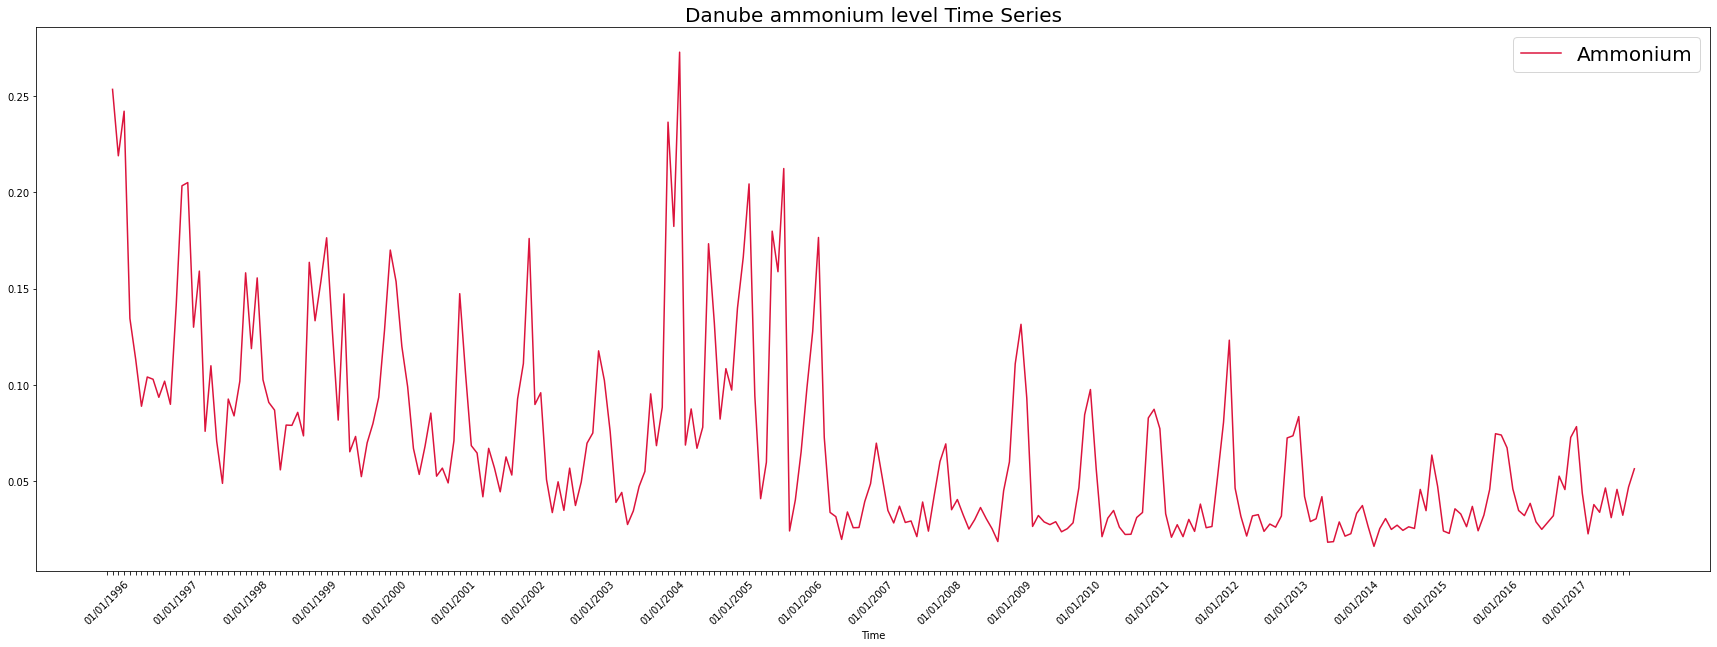

In [ ]:
n = data.shape[0]
time = np.linspace(start=1,stop=n,num=n,dtype=int)

#Xticks
t = []
for e in data.Months:
    if "/01/" in e:
        t.append(e)
    else:
        t.append(" ")
        
#Extraction
NH = data["Ammonium"] 

#Plots
plt.figure(figsize=(30, 10))
plt.plot(time, NH, color = "crimson")

#Plots features
plt.xticks(data.index, t, rotation = 45);
plt.title("Danube ammonium level Time Series",fontsize=20)
plt.xlabel("Time")
plt.legend(["Ammonium"],fontsize=20)

Normalize data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(pd.DataFrame(NH))

In [ ]:
print('Min', np.min(NH))
print('Max', np.max(NH))
print('Scaled data:')
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.016333
Max 0.272619
Scaled data:
Min 0.0
Max 0.9999999999999999


Split data

In [ ]:
train_size = 252
train, test = scaled[0:train_size, :], scaled[train_size: , :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 252
test: 12


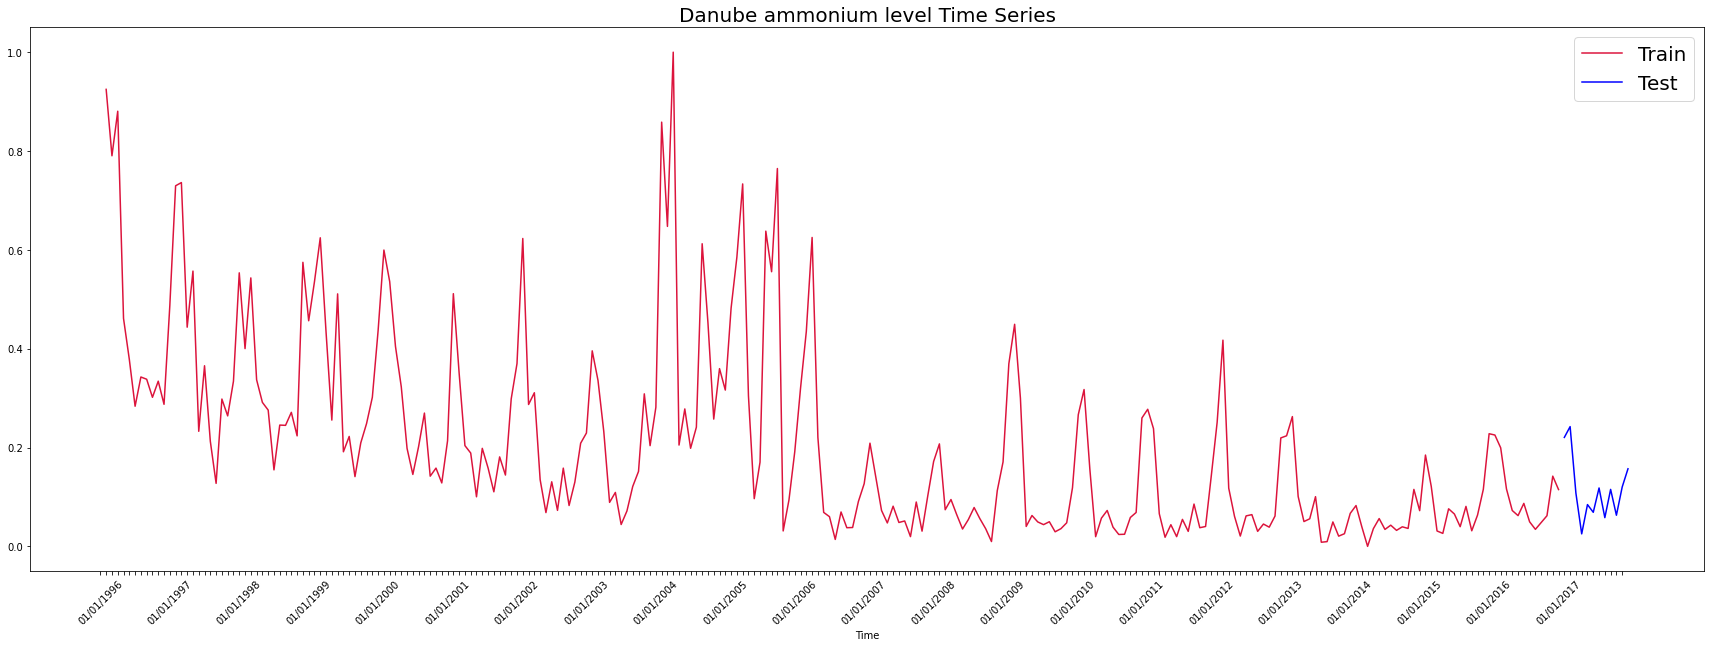

In [ ]:
#Plots
plt.figure(figsize=(30, 10))
plt.plot(time[:train_size], train, color = "crimson")
plt.plot(time[train_size:], test, color = "blue")

#Plots features
plt.xticks(data.index, t, rotation = 45);
plt.title("Danube ammonium level Time Series",fontsize=20)
plt.xlabel("Time")
plt.legend(["Train","Test"],fontsize=20)

### QUESTION 2: Representation des données

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

### QUESTION 3: Reshape

The input to every LSTM/RNN layer must be three-dimensional.
The three dimensions of this input are:

-Samples: One sequence is one sample. A batch is comprised of one or more samples.

-Time Steps: One time step is one point of observation in the sample.

-Features: One feature is one observation at a time step.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(250, 1, 1)
(10, 1, 1)


### QUESTION 4 : RNN/LSTM

Recurrent neural network

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
250/250 - 2s - loss: 0.0482 - 2s/epoch - 8ms/step
Epoch 2/100
250/250 - 0s - loss: 0.0316 - 414ms/epoch - 2ms/step
Epoch 3/100
250/250 - 0s - loss: 0.0284 - 374ms/epoch - 1ms/step
Epoch 4/100
250/250 - 0s - loss: 0.0260 - 389ms/epoch - 2ms/step
Epoch 5/100
250/250 - 0s - loss: 0.0231 - 370ms/epoch - 1ms/step
Epoch 6/100
250/250 - 0s - loss: 0.0204 - 389ms/epoch - 2ms/step
Epoch 7/100
250/250 - 0s - loss: 0.0204 - 392ms/epoch - 2ms/step
Epoch 8/100
250/250 - 0s - loss: 0.0190 - 372ms/epoch - 1ms/step
Epoch 9/100
250/250 - 0s - loss: 0.0181 - 391ms/epoch - 2ms/step
Epoch 10/100
250/250 - 0s - loss: 0.0184 - 394ms/epoch - 2ms/step
Epoch 11/100
250/250 - 0s - loss: 0.0172 - 358ms/epoch - 1ms/step
Epoch 12/100
250/250 - 0s - loss: 0.0176 - 361ms/epoch - 1ms/step
Epoch 13/100
250/250 - 0s - loss: 0.0174 - 378ms/epoch - 2ms/step
Epoch 14/100
250/250 - 0s - loss: 0.0182 - 348ms/epoch - 1ms/step
Epoch 15/100
250/250 - 0s - loss: 0.0170 - 372ms/epoch - 1ms/step
Epoch 16/100
250/250 -

### QUESTION 5: Performance

In [ ]:
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(X_test, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.02 RMSE


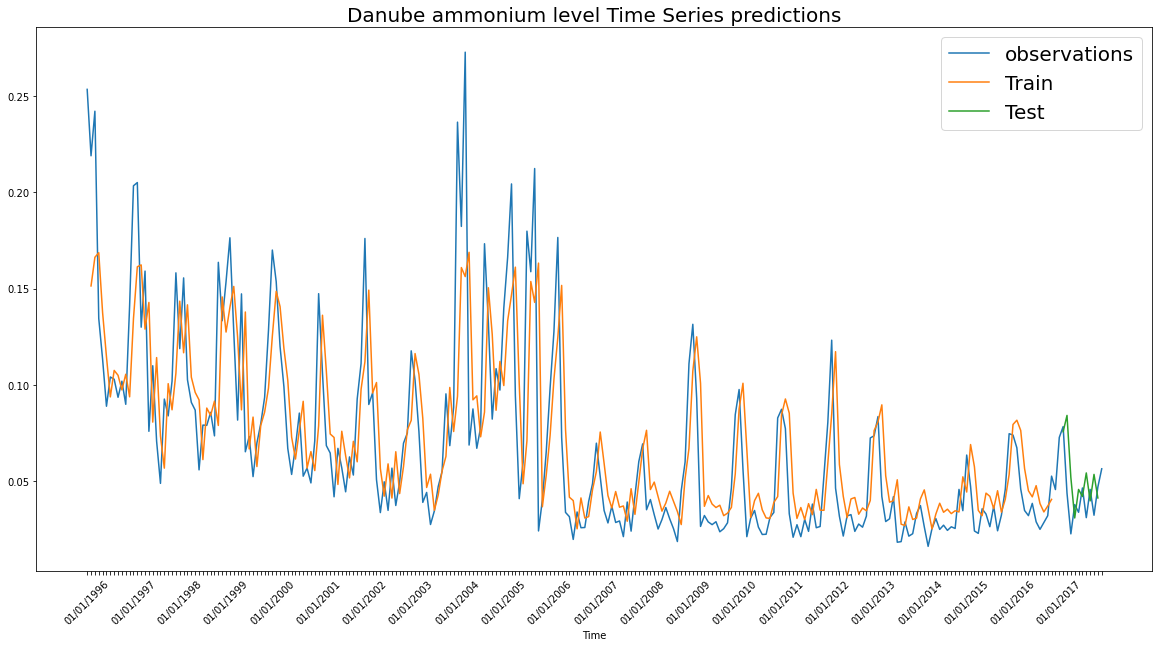

In [ ]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#Plots features
plt.xticks(data.index, t, rotation = 45);
plt.title("Danube ammonium level Time Series predictions",fontsize=20)
plt.xlabel("Time")
plt.legend(["observations","Train","Test"],fontsize=20)
plt.show()

### QUESTION 6: modèle de série chronologique classique

ACF VS. PACF

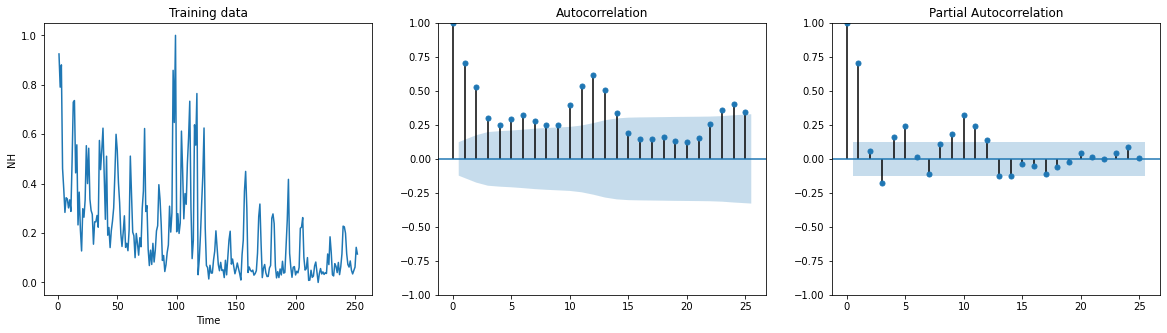

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))
ax1.plot(np.linspace(start=1,stop=train.shape[0],num=train.shape[0]), train)
ax1.set_title("Training data"); ax1.set_xlabel("Time"); ax1.set_ylabel("NH")
plot_acf(train, ax = ax2);
plot_pacf(train, ax = ax3);

Optimal model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#find optimal model
model = pm.auto_arima(train, start_p=1, start_q=1, test='adf', 
                      max_p=5, max_q=5, m=12,             
                      d=0, seasonal=False, start_P=0, 
                      D=0, trace=True, error_action='ignore',  
                      suppress_warnings=True,stepwise=True)

print(model.summary());

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-268.995, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=91.567, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-266.264, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-69.984, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-270.832, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-269.573, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-269.231, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-290.134, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-269.837, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-276.121, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-311.319, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-308.472, Time=0.22 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-319.887, Time=0.50 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-322.622, Time=0.59 sec
 ARIMA(4,0,2)(0,0,0)[0]             

Model ARIMA(4,0,3)(0,0,0)[0] 

In [ ]:
import statsmodels.api as sm
# Fit the model 
mod = sm.tsa.statespace.SARIMAX(train, order=(4,0,3), seasonal_order=(0,0,0,0))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(4, 0, 3)   Log Likelihood                 169.311
Date:                Wed, 24 Nov 2021   AIC                           -322.622
Time:                        14:21:54   BIC                           -294.387
Sample:                             0   HQIC                          -311.261
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1099      0.099     21.364      0.000       1.916       2.303
ar.L2         -2.2046      0.194    -11.340      0.000      -2.586      -1.824
ar.L3          1.3525      0.184      7.359      0.0

In [ ]:
predict = res.get_prediction()
forecast = predict.predicted_mean
fcast=res.forecast(steps=12)

rmse_train=math.sqrt(mean_squared_error(train.reshape(252),forecast))
print('Train Score: %.2f RMSE' % (rmse_train))
rmse_test=math.sqrt(mean_squared_error(test.reshape(12),fcast))
print('Test Score: %.2f RMSE' % (rmse_test))

Train Score: 0.13 RMSE
Test Score: 0.07 RMSE


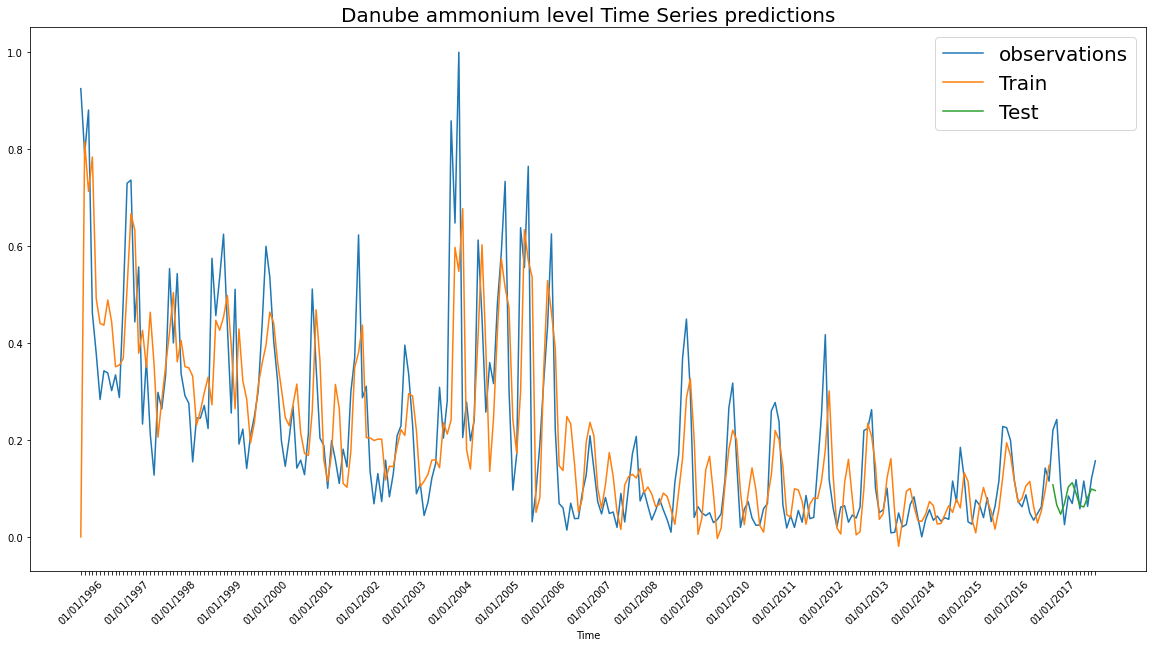

In [ ]:
testPredictPlot = np.empty_like(NH)
testPredictPlot[:] = np.nan
testPredictPlot[len(train):len(scaled)] = fcast
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaled)
plt.plot(forecast)
plt.plot(testPredictPlot)
#Plots features
plt.xticks(data.index, t, rotation = 45);
plt.title("Danube ammonium level Time Series predictions",fontsize=20)
plt.xlabel("Time")
plt.legend(["observations","Train","Test"],fontsize=20)
plt.show()

The RMSE scores are comparable to the neural network results which means that using one feature doesn't significantly improve the results in the neural network compared to classic  time series models 

### QUESTION 8

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Danube ammonium level complete data Time Series.csv to Danube ammonium level complete data Time Series (2).csv


Saving Danube ammonium level complete data Time Series.csv to Danube ammonium level complete data Time Series (3).csv


In [ ]:
data_complete=pd.read_csv('Danube ammonium level complete data Time Series.csv', error_bad_lines=False, delimiter=';', decimal=',')

In [ ]:
data_complete.head()

,Months,Ammonium,TSS,Alkalinity,Conductivity,DO,pH,WT
0,01/01/1996,0.253333,7.016667,3.836667,455.916667,12.383333,8.056667,2.075000
1,01/02/1996,0.218889,6.666667,3.968889,458.000000,12.877778,8.068889,1.911111
2,01/03/1996,0.242000,21.420000,3.798000,462.900000,12.990000,8.083000,3.930000
3,01/04/1996,0.134545,13.400000,3.337273,399.727273,11.404545,8.180000,8.863636
4,01/05/1996,0.113333,25.666667,3.032222,350.444444,11.055556,8.393333,14.455556


VISUALISATION

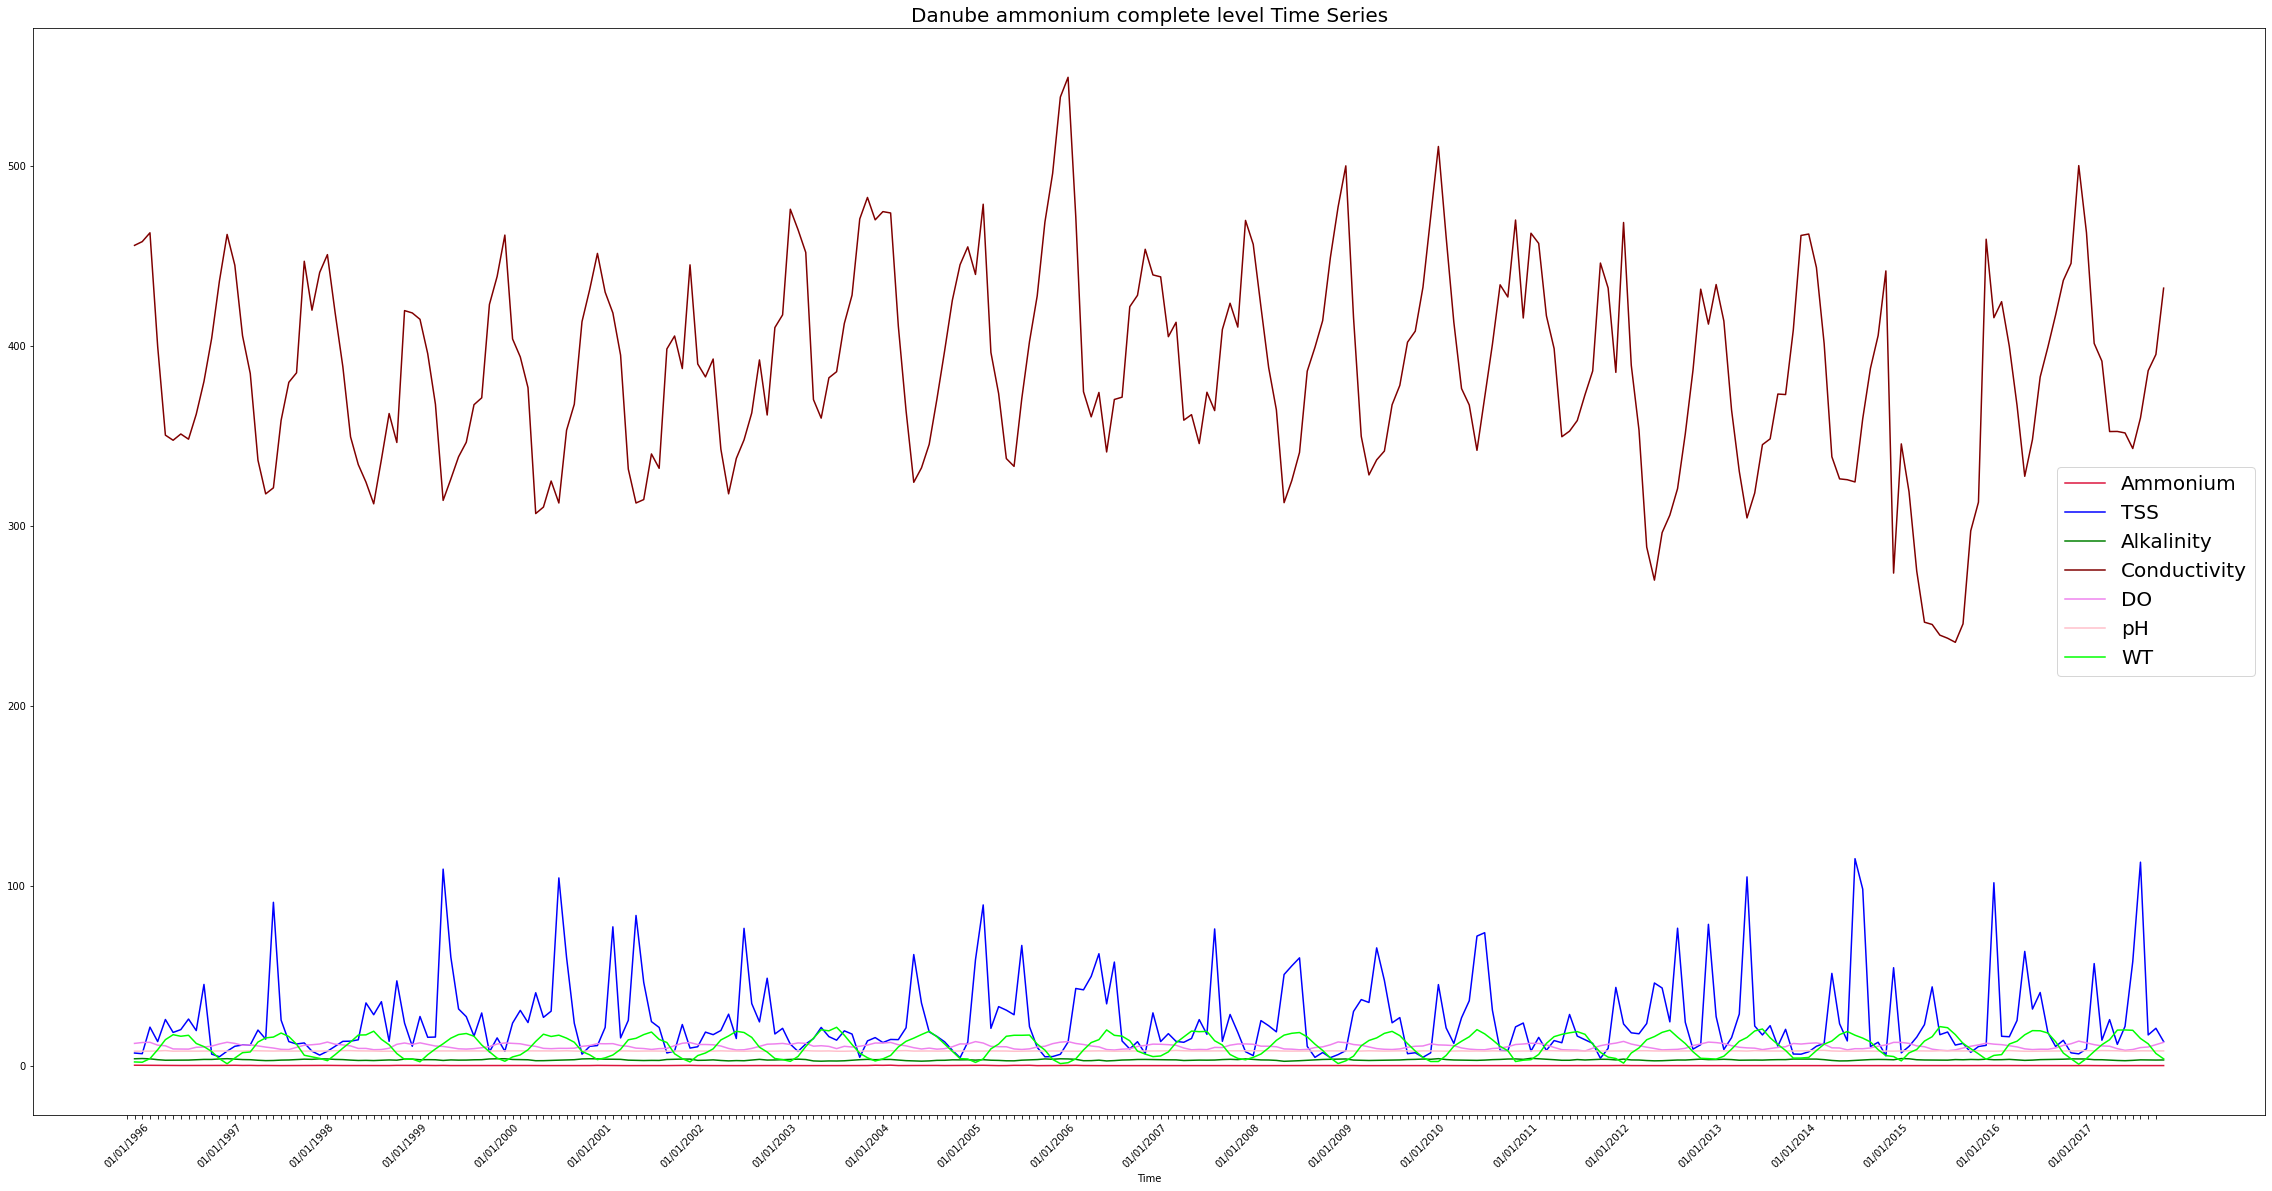

In [ ]:

plt.figure(figsize=(40, 20))
plt.plot(time, data_complete["Ammonium"] , color = "crimson")
plt.plot(time, data_complete["TSS"] , color = "blue")
plt.plot(time, data_complete["Alkalinity"] , color = "green")
plt.plot(time, data_complete["Conductivity"] , color = "maroon")
plt.plot(time, data_complete["DO"] , color = "violet")
plt.plot(time, data_complete["pH"] , color = "pink")
plt.plot(time, data_complete["WT"] , color = "lime")

#Plots features
plt.xticks(data.index, t, rotation = 45);
plt.title("Danube ammonium complete level Time Series",fontsize=20)
plt.xlabel("Time")
plt.legend(["Ammonium","TSS","Alkalinity","Conductivity","DO","pH","WT"],fontsize=20)

Scale data 

In [ ]:
dt=data_complete.drop('Months', 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dt)

Split data

In [ ]:
train_size = 252
train_c, test_c = scaled_data[0:train_size, :], scaled_data[train_size: , :]
X_train_c, y_train_c = train_c, train_c[:,:1]
X_test_c, y_test_c = test_c, test_c[:,:1]

Reshape data

In [ ]:
X_train_c = np.reshape(X_train_c, (X_train_c.shape[0],1, X_train_c.shape[1]))
X_test_c = np.reshape(X_test_c, (X_test_c.shape[0],1, X_test_c.shape[1]))
print(X_train_c.shape)
print(X_test_c.shape)

(252, 1, 7)
(12, 1, 7)


Neural Network

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(5, batch_input_shape=(batch_size, 1, 7), stateful=True))
model.add(Dense(units=7))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_c,y_train_c,  epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
252/252 - 2s - loss: 0.0628 - 2s/epoch - 7ms/step
Epoch 2/100
252/252 - 0s - loss: 0.0394 - 414ms/epoch - 2ms/step
Epoch 3/100
252/252 - 0s - loss: 0.0334 - 417ms/epoch - 2ms/step
Epoch 4/100
252/252 - 0s - loss: 0.0314 - 410ms/epoch - 2ms/step
Epoch 5/100
252/252 - 0s - loss: 0.0277 - 401ms/epoch - 2ms/step
Epoch 6/100
252/252 - 0s - loss: 0.0223 - 397ms/epoch - 2ms/step
Epoch 7/100
252/252 - 0s - loss: 0.0160 - 396ms/epoch - 2ms/step
Epoch 8/100
252/252 - 0s - loss: 0.0100 - 410ms/epoch - 2ms/step
Epoch 9/100
252/252 - 0s - loss: 0.0061 - 413ms/epoch - 2ms/step
Epoch 10/100
252/252 - 0s - loss: 0.0039 - 394ms/epoch - 2ms/step
Epoch 11/100
252/252 - 0s - loss: 0.0024 - 410ms/epoch - 2ms/step
Epoch 12/100
252/252 - 0s - loss: 0.0017 - 381ms/epoch - 2ms/step
Epoch 13/100
252/252 - 0s - loss: 0.0013 - 403ms/epoch - 2ms/step
Epoch 14/100
252/252 - 0s - loss: 9.4221e-04 - 404ms/epoch - 2ms/step
Epoch 15/100
252/252 - 0s - loss: 7.8822e-04 - 374ms/epoch - 1ms/step
Epoch 16/100
2

Performance : RMSE

In [ ]:
#predictions
trainPredict_c = model.predict(X_train_c, batch_size=batch_size)
model.reset_states()
testPredict_c = model.predict(X_test_c, batch_size=batch_size)

# invert predictions
trainPredict_c = scaler.inverse_transform(trainPredict_c)
testPredict_c = scaler.inverse_transform(testPredict_c)
#scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(pd.DataFrame(NH))

y_train_c = scaler.inverse_transform(y_train_c)
y_test_c = scaler.inverse_transform(y_test_c)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train_c[:,0], trainPredict_c[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_c[:,0], testPredict_c[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


Result visualisation

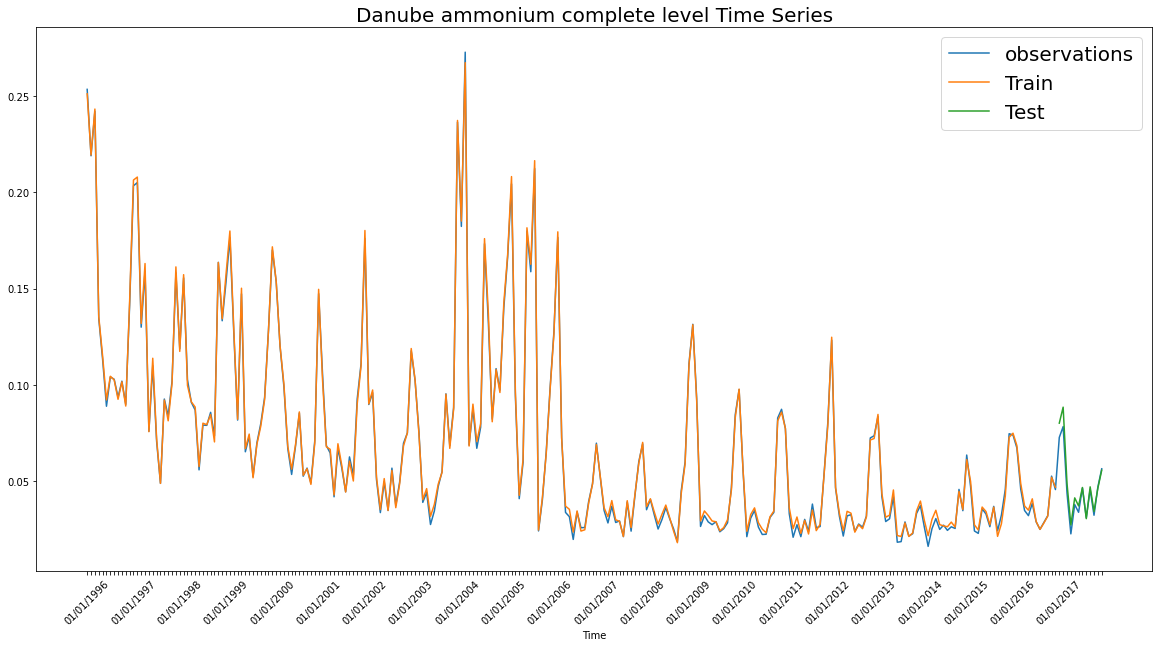

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(NH)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+2:len(NH)] = testPredict_c[:,0]
# plot baseline and predictions
plt.figure(figsize=(20,10))

plt.plot(NH)
plt.plot(trainPredict_c[:,0])
plt.plot(testPredictPlot)

#Plots features
plt.xticks(data.index, t, rotation = 45);
plt.title("Danube ammonium complete level Time Series",fontsize=20)
plt.xlabel("Time")
plt.legend(["observations","Train","Test"],fontsize=20)
plt.show()